In [2]:
# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [4]:
# Reading Data
data = pd.read_csv('HeadtoBrain.csv')
print(data.shape)
data.head(20)

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [5]:
X=data["Head Size(cm^3)"].values
Y=data['Brain Weight(grams)'].values

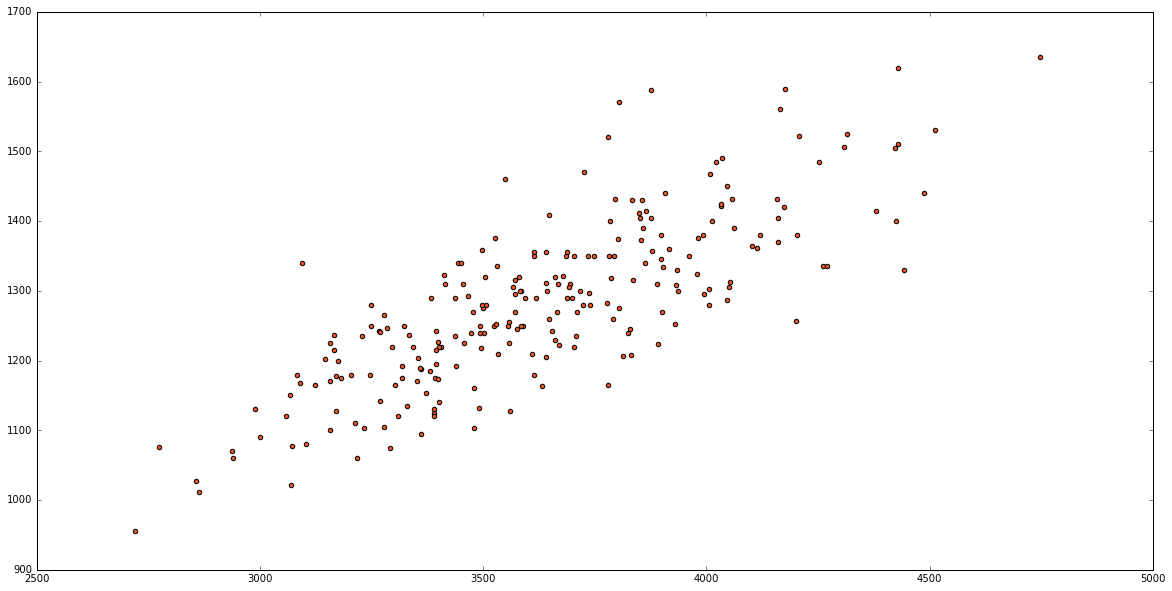

In [6]:
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

Calculating Mean

In [7]:
mean_x=np.mean(X)
mean_y=np.mean(Y)

Calculating Length

In [8]:
m=len(X)

In [9]:
numer=0
deno=0


In [10]:
for i in range (m):
    numer+= ((X[i]-mean_x)*(Y[i]-mean_y))
    deno += np.square(X[i]-mean_x)

In [11]:
print(numer)
print(deno)

8294376.74683544
31486153.983122338


In [12]:
b1 =numer/deno
b0=mean_y - (b1*mean_x)

In [13]:
print(b1)
print(b0)

0.26342933948939945
325.57342104944223


## y=mx+c (y=b1x+b0)

### Brainweight = b1*headsize + b0

In [14]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

In [15]:
# Calculating line values x and y

#linspace returns array of values
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

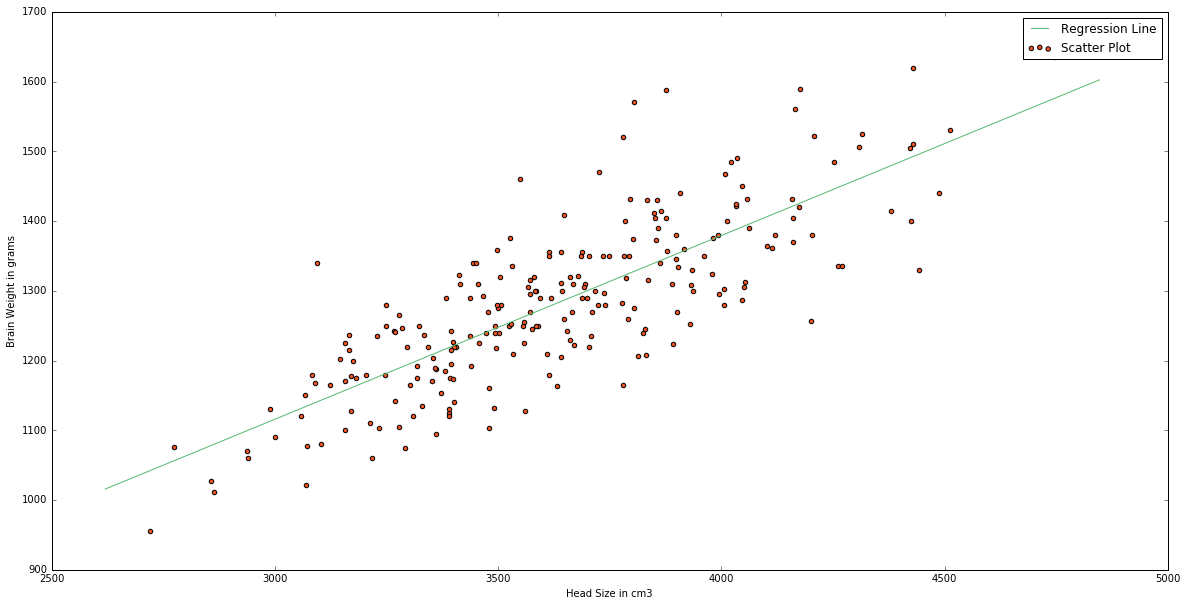

In [16]:
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
plt.plot(x, y, color='#58b970', label='Regression Line')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

## Mearsure of fitness RMSE and R2

### Finding RMSE


In [ ]:
rmse=0
for i in range(m):
    y_pred = b1*X[i]+b0
    rmse+= np.square(y_pred-Y[i])
rmse = np.sqrt(rmse/m)
print (rmse)

### Finding R2


In [ ]:
r2=0
ss_r = 0
ss_t = 0
for i in range(m):
    y_pred = b1*X[i]+b0
    ss_r += np.square(Y[i]-y_pred)
    ss_t += np.square(Y[i]-mean_y)
r2 = 1-(ss_r/ss_t)
print(r2)

# Using SKLearn

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [18]:
print(X.shape)
# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
print(X.shape)

(237,)
(237, 1)


In [20]:
reg.predict(45)

array([337.42774133])

In [21]:
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

In [22]:
# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

In [23]:
print(rmse,r2_score)

72.1206213783709 0.639311719957


In [24]:
import dill as pickle


In [25]:
file = "regression.pk"
with open(file, 'wb') as file:
        pickle.dump(reg, file)



# Gradient Descent for Linear Regression

In [ ]:

X = data.iloc[:, 2]
Y = data.iloc[:, -1]
plt.scatter(X, Y)
plt.show()


In [ ]:
X.shape

In [ ]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs =50# The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    #print(Y_pred," ",D_m," ",D_c)
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

In [ ]:
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()